/mnt/DATA1/chenbo/miniconda3/envs/ChineseNMT/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


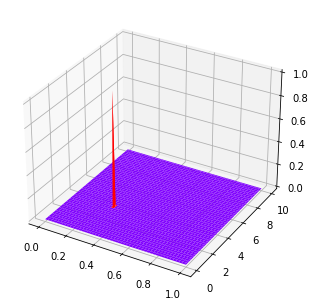

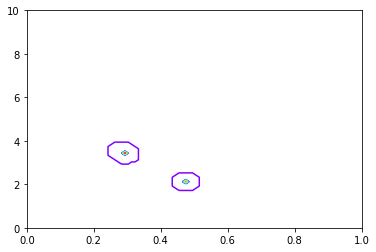

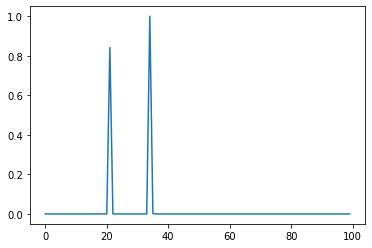

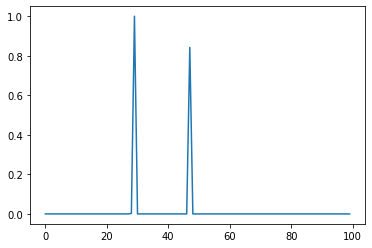

In [14]:
import numpy as np
import pandas as pd
import scipy.io as scio 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Gaussian_distribution(max_D, avg, num, sig):
    avg = avg.T
    xgrid = np.linspace(0, max_D, num)
    sqrt_2pi=np.power(2*np.pi,0.5)
    coef=1/(sqrt_2pi*sig)
    powercoef=-1/(2*np.power(sig,2))
    mypow=powercoef*(np.power((xgrid-avg),2))
    result = coef*(np.exp(mypow))
    return result/np.max(result, 1)[:, np.newaxis]

max_D = 10
max_T2 = 1
sig_D = 0.01
sig_T2 = 0.001
D_label_dim = 100
T2_label_dim = 100
# D = pd.read_csv('Net_Results/Laplace2D/2022-12-20-21_02_44/diffusion_coeffs.csv').columns.to_numpy(dtype=np.float32)
# T2 = pd.read_csv('Net_Results/Laplace2D/2022-12-20-21_02_44/relax_time.csv').columns.to_numpy(dtype=np.float32)
# amp = pd.read_csv('Net_Results/Laplace2D/2022-12-20-21_02_44/amplitude.csv').columns.to_numpy(dtype=np.float32)
D = pd.read_csv('Net_Results/Laplace2D/2022-12-20-20_56_08/diffusion_coeffs.csv').columns.to_numpy(dtype=np.float32)
T2 = pd.read_csv('Net_Results/Laplace2D/2022-12-20-20_56_08/relax_time.csv').columns.to_numpy(dtype=np.float32)
amp = pd.read_csv('Net_Results/Laplace2D/2022-12-20-20_56_08/amplitude.csv').columns.to_numpy(dtype=np.float32)

label_D = Gaussian_distribution(max_D, D[np.newaxis, :], D_label_dim, sig=sig_D)
label_T2 = Gaussian_distribution(max_T2, 1 / T2[np.newaxis, :], T2_label_dim, sig=sig_T2)

label = np.zeros([D_label_dim, T2_label_dim]).astype(float)
for j in np.arange(len(D)):
    label = label + amp[j] * np.dot(label_D[j, :][:, np.newaxis], label_T2[j, :][np.newaxis, :])
label = label / np.max(label)

figure = plt.figure(1)
axes = Axes3D(figure)

X = np.linspace(0, 1, 100)
Y = np.linspace(0, 10, 100)

X,Y = np.meshgrid(X, Y)
Z = label
axes.plot_surface(X,Y,Z,cmap='rainbow')

plt.figure(2)
plt.contour(np.linspace(0, 1, 100), np.linspace(0, 10, 100), Z, 20, cmap='rainbow')
plt.show()

plt.figure(3)
plt.plot(np.sum(label, axis=1).T / np.max(np.sum(label, axis=1)))
plt.figure(4)
plt.plot(np.sum(label, axis=0).T / np.max(np.sum(label, axis=0)))